# Data Analysis using python

### Diwali Sales Analysis

Importing all the necessary libraries needed for analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# importing dataset

df = pd.read_csv('diwali_sales.csv', encoding = 'unicode_escape')

In [3]:
df.head(3)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN


In [4]:
# Getting all the information about the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
# Getting the shape i.e number of rows, number of columns
df.shape

(11251, 15)

In [6]:
# Dropping unwanted columns
df.drop(['Status', 'unnamed1'], axis = 1, inplace = True)

In [7]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [8]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
df[df['Amount'].isnull()]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN
14,1003858,Cano,P00293742,M,46-50,46,1,Madhya Pradesh,Central,Hospitality,Auto,3,NaN
16,1005447,Amy,P00275642,F,46-50,48,1,Andhra Pradesh,Southern,IT Sector,Auto,3,NaN
109,1005265,Sakshi,P00296242,F,46-50,48,1,Delhi,Central,Banking,Footwear & Shoes,1,NaN
111,1005261,Apoorva,P00057942,F,36-45,41,1,Delhi,Central,IT Sector,Footwear & Shoes,2,NaN
184,1005538,Kartik,P00269542,F,46-50,49,1,Karnataka,Southern,Banking,Footwear & Shoes,1,NaN
293,1000326,Jonathan,P00120542,M,51-55,53,0,Gujarat,Western,IT Sector,Footwear & Shoes,3,NaN
344,1002507,Lakshmi,P00045842,F,26-35,35,1,Gujarat,Western,Chemical,Furniture,1,NaN
345,1004498,Srishti,P00030842,F,51-55,55,0,Delhi,Central,Textile,Footwear & Shoes,1,NaN
452,1004601,Gaurav,P00014442,F,36-45,40,1,Madhya Pradesh,Central,Hospitality,Food,4,NaN


In [10]:
df.shape

(11251, 13)

In [11]:
df.dropna(subset='Amount', how = 'any',inplace = True)

In [12]:
df.shape

(11239, 13)

In [13]:
# change datatype of Amount column

df['Amount'] = df['Amount'].astype('int')

In [14]:
df['Amount'].dtypes

dtype('int32')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.2+ MB


In [16]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [17]:
df[['Age','Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [18]:
# to see duplicates
df.duplicated().sum()

8

In [19]:
df.loc[df.duplicated(keep=False),:]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
18,1001883,Praneet,P00029842,M,51-55,54,1,Uttar Pradesh,Central,Hospitality,Auto,1,23568
19,1001883,Praneet,P00029842,M,51-55,54,1,Uttar Pradesh,Central,Hospitality,Auto,1,23568
4403,1004725,Jackson,P00150842,F,36-45,37,1,Maharashtra,Western,Hospitality,Electronics & Gadgets,4,9859
4404,1004725,Jackson,P00150842,F,36-45,37,1,Maharashtra,Western,Hospitality,Electronics & Gadgets,4,9859
5702,1003208,Bowman,P00171642,F,26-35,31,0,Bihar,Eastern,Agriculture,Electronics & Gadgets,4,8088
5703,1003208,Bowman,P00171642,F,26-35,31,0,Bihar,Eastern,Agriculture,Electronics & Gadgets,4,8088
5907,1001260,Dheeraj,P00344042,M,26-35,28,0,Maharashtra,Western,IT Sector,Electronics & Gadgets,4,8015
5908,1001260,Dheeraj,P00344042,M,26-35,28,0,Maharashtra,Western,IT Sector,Electronics & Gadgets,4,8015
6172,1001325,Reese,P00111742,F,26-35,27,1,Gujarat,Western,Construction,Electronics & Gadgets,3,7923
6173,1001325,Reese,P00111742,F,26-35,27,1,Gujarat,Western,Construction,Electronics & Gadgets,3,7923


In [20]:
df.shape

(11239, 13)

In [21]:
# dropping duplicates
df.drop_duplicates(inplace = True)

In [22]:
df.shape

(11231, 13)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11231 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11231 non-null  int64 
 1   Cust_name         11231 non-null  object
 2   Product_ID        11231 non-null  object
 3   Gender            11231 non-null  object
 4   Age Group         11231 non-null  object
 5   Age               11231 non-null  int64 
 6   Marital_Status    11231 non-null  int64 
 7   State             11231 non-null  object
 8   Zone              11231 non-null  object
 9   Occupation        11231 non-null  object
 10  Product_Category  11231 non-null  object
 11  Orders            11231 non-null  int64 
 12  Amount            11231 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.2+ MB


# Exploratory Data Analysis

Gender

In [24]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

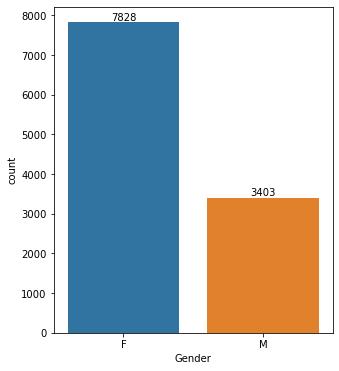

In [25]:
plt.figure(figsize = (5,6))
ax = sns.countplot(x='Gender', data = df)
for bars in ax.containers:
    ax.bar_label(bars)

In [26]:
# Total amount spent by each Gender

In [27]:
df.groupby('Gender',as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

,Gender,Amount
0,F,74307679
1,M,31871146


In [28]:
sales_gen = df.groupby('Gender',as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

<AxesSubplot:xlabel='Gender', ylabel='Amount'>

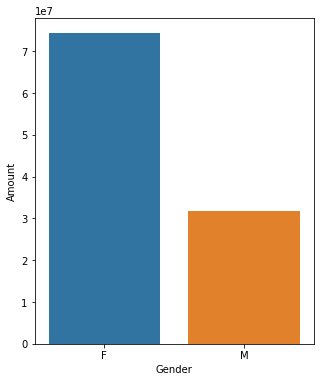

In [29]:
plt.figure(figsize = (5,6))
sns.barplot(x = 'Gender', y = 'Amount', data = sales_gen)


From above two graph we can see that most buyers and amount spent for shopping are by Female category as compared
with Males

In [30]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

AGE

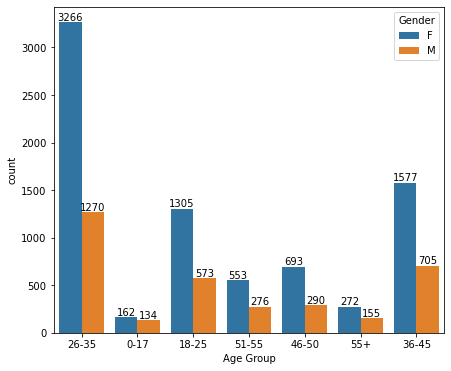

In [31]:
plt.figure(figsize = (7,6))
ax1 = sns.countplot(x='Age Group', data = df, hue='Gender')
for bars in ax1.containers:
    ax1.bar_label(bars)

In [32]:
sale_age = df.groupby('Age Group', as_index = False)['Amount'].sum().sort_values('Amount', ascending = False)

<AxesSubplot:xlabel='Age Group', ylabel='Amount'>

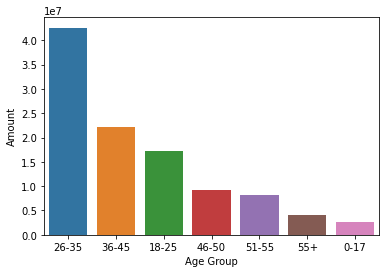

In [33]:
sns.barplot(x = 'Age Group', y = 'Amount', data = sale_age)

From th above graph we can see that most of the buyers are from the age group 26 to 35 and female 
buyers are more as compared to male.

### State

In [34]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [35]:
# Total sales by each state
sales_state_wise = df.groupby('State')['Amount'].sum().sort_values(ascending = False)

In [36]:
sales_state_wise.head(5)

State
Uttar Pradesh     19346055
Maharashtra       14404467
Karnataka         13523540
Delhi             11603818
Madhya Pradesh     8101142
Name: Amount, dtype: int32

<AxesSubplot:xlabel='State', ylabel='sales'>

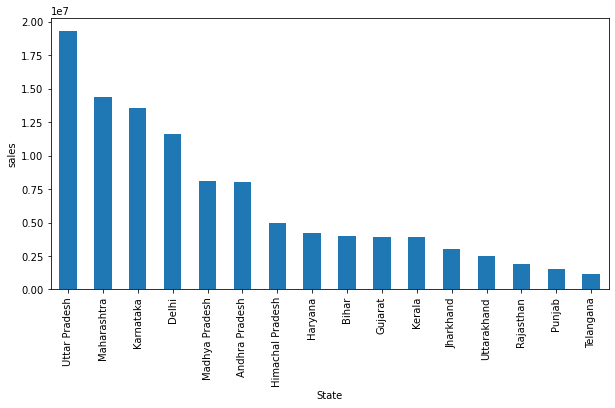

In [37]:
plt.figure(figsize = (10,5))
plt.ylabel('sales')
sales_state_wise.plot(kind = 'bar')

In [38]:
# Total orders by each States
orders_state_wise = df.groupby('State')['Orders'].sum().sort_values(ascending = False)

In [39]:
orders_state_wise.head(5)

State
Uttar Pradesh     4803
Maharashtra       3798
Karnataka         3240
Delhi             2740
Madhya Pradesh    2252
Name: Orders, dtype: int64

<AxesSubplot:xlabel='State', ylabel='orders'>

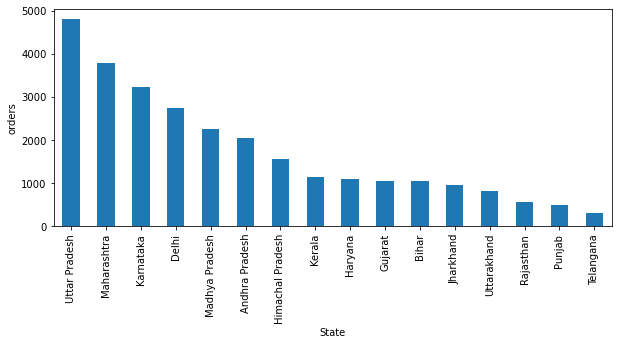

In [40]:
plt.figure(figsize = (10,4))
plt.ylabel('orders')
orders_state_wise.plot(kind = 'bar')

### Zone wise sales and orders 

<AxesSubplot:xlabel='Zone', ylabel='count'>

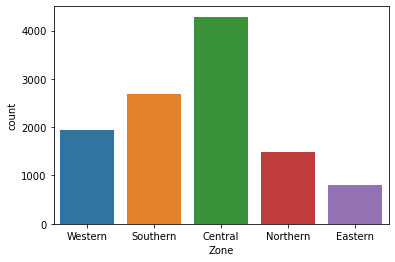

In [41]:
# shows count of observation from Zone
sns.countplot(x = 'Zone', data = df)

In [42]:
# sales in each zone

zone_wise_sales = df.groupby('Zone').Amount.sum().sort_values(ascending = False)

In [43]:
zone_wise_sales

Zone
Central     41571959
Southern    26606667
Western     18342626
Northern    12616448
Eastern      7041125
Name: Amount, dtype: int32

<AxesSubplot:xlabel='Zone', ylabel='sales'>

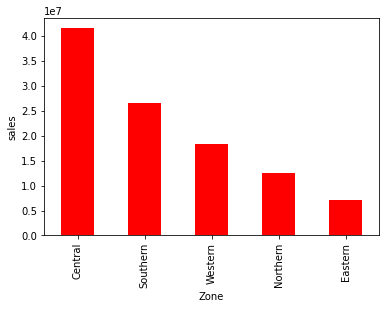

In [44]:
plt.ylabel('sales')
zone_wise_sales.plot(kind = 'bar', color = 'red')

In [45]:
# Zone wise orders
zone_orders = df.groupby('Zone')['Orders'].sum().sort_values(ascending = False)

In [46]:
zone_orders

Zone
Central     10619
Southern     6740
Western      4861
Northern     3724
Eastern      2011
Name: Orders, dtype: int64

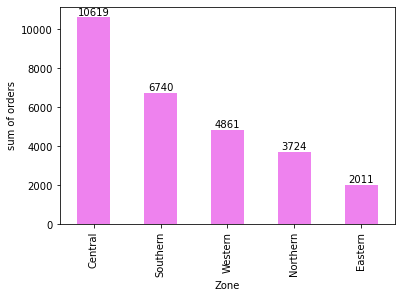

In [47]:
plt.ylabel('sum of orders')
c = zone_orders.plot(kind = 'bar', color = 'violet')
for bars in c.containers:
    c.bar_label(bars)

#### Note:- Mostly highest sales and orders happend in central, southern and western region

#### Marital_Status

In [48]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

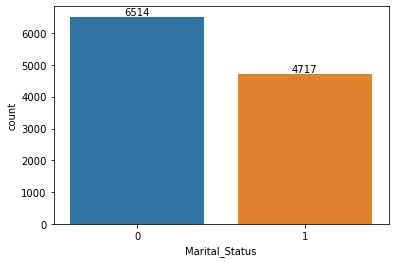

In [49]:
# Martial status- married or unmarried spent more?
# 0 - unmarried, 1- married
ax2 = sns.countplot(x = 'Marital_Status', data = df)
for bars in ax2.containers:
    ax2.bar_label(bars)


In [50]:
sales_marital = df.groupby('Marital_Status').Amount.sum().sort_values(ascending = False)

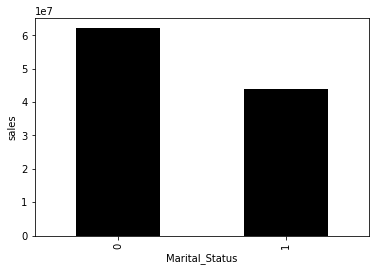

In [51]:
plt.ylabel('sales')
b = sales_marital.plot(kind = 'bar', color = 'black')
#for bars in b.containers:
 #   b.bar_label(bars)

#### Note:- From above, Unmarried people purchasing more

In [52]:
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934


#### Product_Categry

In [53]:
# total orders for each product_category
product_count = df.groupby(['Product_Category']).Orders.sum().sort_values(ascending = False)

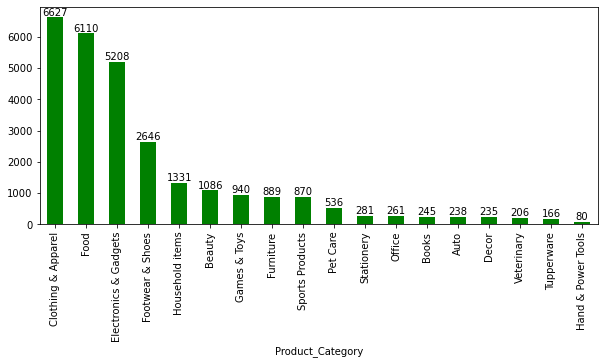

In [54]:
plt.figure(figsize = (10,4))
d = product_count.plot(kind = 'bar', color = 'green')
for bars in d.containers:
    d.bar_label(bars)

In [55]:
product_sales = df.groupby(['Product_Category']).Amount.sum().sort_values(ascending = False)

In [56]:
product_sales.head(5)

Product_Category
Food                     33933883
Clothing & Apparel       16484472
Electronics & Gadgets    15607657
Footwear & Shoes         15575209
Furniture                 5440051
Name: Amount, dtype: int32

<AxesSubplot:xlabel='Product_Category', ylabel='sales'>

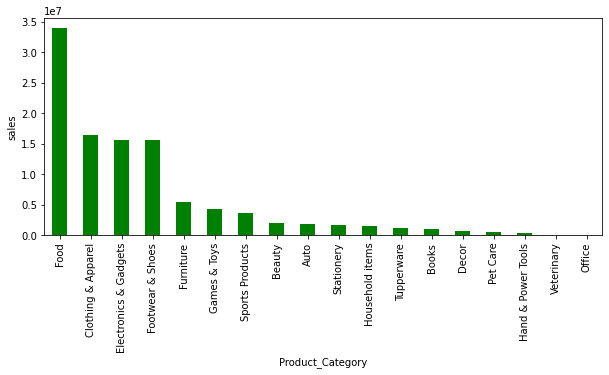

In [57]:
plt.figure(figsize = (10,4))
plt.ylabel('sales')
product_sales.plot(kind = 'bar', color = 'green')

In [62]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

#### Occupation

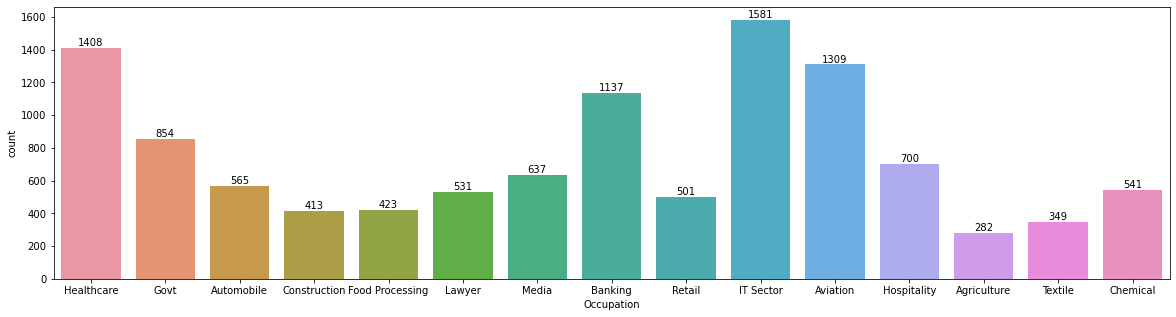

In [67]:
plt.figure(figsize = (20,5))
occ_count = sns.countplot(x = 'Occupation', data = df)
for bars in occ_count.containers:
    occ_count.bar_label(bars)

In [71]:
occu_sales = df.groupby('Occupation').Amount.sum().sort_values(ascending=False)

<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

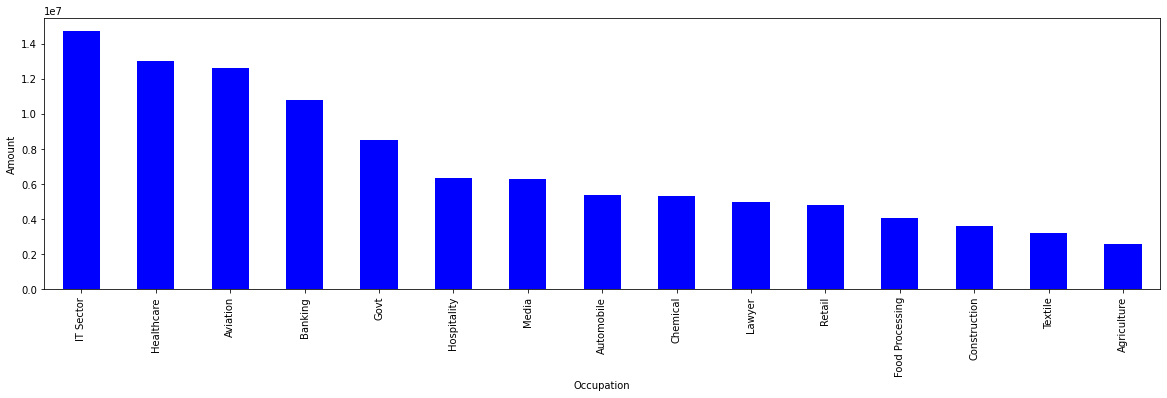

In [75]:
plt.figure(figsize = (20,5))
plt.ylabel('Amount')
occu_sales.plot(kind = 'bar', color = 'blue')

#### From the above graph IT sector, Healthcare, Aviation, Banking working professionals purchase more
as compared to other sectors

### Conclusion: